In [98]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms,datasets
from PIL import Image
import numpy as np
import pandas as pd
import os
import sys
import random
import matplotlib.pyplot as plt
print(f"Đã import các thư viện cần thiết")

#thêm đường dẫn src vào path
module_path=os.path.abspath(os.path.join('.'))
if module_path not in sys.path:
    sys.path.append(module_path)
print(f"Đã thêm đường dẫn src vào path")

#import các model được định nghĩa
print(f"Đang chạy model.ipynb")
%run ./model.ipynb
print(f"Đã chạy model.ipynb thành công")
try:
    _=SimpleCNN
except NameError as e:
    print(f"Lỗi: {e}")
    print("Vui lòng chạy lại model.ipynb và loss.ipynb trước khi chạy đoạn mã này.")
    exit()

Đã import các thư viện cần thiết
Đã thêm đường dẫn src vào path
Đang chạy model.ipynb
Đã import các thư viện cần thiết
Chạy model.ipynb để kiểm tra
Khởi tạo SimpleCNN với num_classes=1,img_size=150
Flatten size: 20736

 Kiến trúc model: 
SimpleCNN(
  (features): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=20736, out_features=512, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4):

# Cấu hình inference

In [99]:
print(f"\n Cấu hình lại inference")

#tham số model và dữ liệu 
img_size=150
num_model_classes=1
class_names=['Mèo' , 'Chó'] #tên lớp
print(f"Đã cấu hình lại inference với kích thước ảnh {img_size} và số lớp {num_model_classes}")

#đường dẫn
checkpoint_dir='../checkpoint' #thư mục chứa checkpoint
result_dir='../output/result' 
data_dir='../data' #thư mục chứa dữ liệu gốc
val_dir=os.path.join(data_dir,'validation') #đường dẫn tới validation
os.makedirs(result_dir,exist_ok=True) #tạo thư mục kết quả nếu chưa tồn tại
print(f"Inference - Checkpoint Dir: {os.path.abspath(checkpoint_dir)}")
print(f"Inference - Results Dir: {os.path.abspath(result_dir)}")
print(f"Inference - Validation Dir: {os.path.abspath(val_dir)}")

#chọn checkpoint model
model_filename='bestmodel.path'
checkpoint_path=os.path.join(checkpoint_dir,model_filename)
if not os.path.exists(checkpoint_path):
    print(f"Lỗi : không tìm thấy đường dân tới checkpoint {checkpoint_path}")
    exit()
print(f"Đã chọn checkpoint model : {model_filename}")

#cấu hình device
if torch.backends.mps.is_available():
    device=torch.device('mps')
elif torch.cuda.is_available():
    device=torch.device('cuda')
else:
    device=torch.device('cpu')
print(f"Inference sẽ chạy trên thiết bị : {device}")


 Cấu hình lại inference
Đã cấu hình lại inference với kích thước ảnh 150 và số lớp 1
Inference - Checkpoint Dir: /Users/namtran/practice.py/mini_project_cats_dogs/checkpoint
Inference - Results Dir: /Users/namtran/practice.py/mini_project_cats_dogs/output/result
Inference - Validation Dir: /Users/namtran/practice.py/mini_project_cats_dogs/data/validation
Đã chọn checkpoint model : bestmodel.path
Inference sẽ chạy trên thiết bị : mps


# Chuẩn bị model và load trọng số từ checkpoint


In [100]:
print(f"\n--- Đang tải model ---")
#định nghĩa transform
normalize_mean=[0.485, 0.456, 0.406]
normalize_std=[0.229, 0.224, 0.225]
inference_transform=transforms.Compose([
    transforms.Resize((img_size,img_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=normalize_mean,std=normalize_std)
])
print(f"Đã định nghĩa lại transform")

#khởi tạo model và load trọng số
model=SimpleCNN(num_classes=num_model_classes,img_size=img_size)
try:
    state_dict=torch.load(checkpoint_path,map_location=device)
    model.load_state_dict(state_dict)
    print(f"Đã tải trọng số từ checkpoint {checkpoint_path}")
except Exception as e:
    print(f"Lỗi khi tải trọng số từ checkpoint {checkpoint_path}: {e}")
    exit()
model.to(device)


--- Đang tải model ---
Đã định nghĩa lại transform
Khởi tạo SimpleCNN với num_classes=1,img_size=150
Flatten size: 20736
Đã tải trọng số từ checkpoint ../checkpoint/bestmodel.path


SimpleCNN(
  (features): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=20736, out_features=512, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=512, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

# Đặt model vào chế độ đánh giá

In [101]:
model.eval()
print(f"\n--Model đã được đặt ở chế độ evaluation--")


--Model đã được đặt ở chế độ evaluation--


# Chuẩn bị dữ liệu đầu vào(lấy ngẫu nhiên từ val set)

In [102]:
print(f"\n--Chuẩn bị dữ liệu cho inference--")
#lựa chọn ảnh
load_random_image=True
image_path_manual='path/to/your/image.jpg' #đường dẫn tới ảnh nếu không muốn load ngẫu nhiên

image_path=None #biến lưu đường dẫn tới ảnh được chọn
input_image_pil=None #biến lưu ảnh PIL đã mở
true_label_name='Unknown' #nhãn thật mặc định là không biết
true_label_idx=-1 #nhãn thật mặc định là -1

try:
    if load_random_image: #nếu load ngẫu nhiên
        print(f"Đang load ảnh ngẫu nhiên từ thư mục {val_dir}")
        if not os.path.exists(val_dir):
            raise FileNotFoundError (f"Thư mục {val_dir} không tồn tại")
        validation_files=datasets.ImageFolder(val_dir)
        if not validation_files.samples:
            raise ValueError (f"Không tìm thấy ảnh trong thư mục {val_dir}")
        random_idx=random.randint(0,len(validation_files)-1)
        image_path,true_label_idx=validation_files.samples[random_idx]
        true_label_name=class_names[true_label_idx]
        input_image_pil=Image.open(image_path)
        input_image_pil=input_image_pil.convert('RGB')
        print(f"Đã load ảnh ngẫu nhiên {image_path} với nhãn thật {true_label_name}")
    else: #nếu không load ngẫu nhiên
        print(f"Đang load ảnh từ đường dẫn {image_path_manual}")
        image_path=image_path_manual
        if not os.path.exists(image_path):
            raise FileNotFoundError (f"Không tìm thấy ảnh tại {image_path}")
        input_image_pil=Image.open(image_path)
        input_image_pil=input_image_pil.convert('RGB')
        true_label_idx=-1
        print(f"Đã load ảnh từ đường dẫn {image_path}")
    input_tensor=inference_transform(input_image_pil)
    input_batch=input_tensor.unsqueeze(0).to(device) #thêm batch dimension
    print(f"shape:{input_batch.shape}")
    print(f"Đã chuyển đổi ảnh thành tensor với kích thước {input_batch.shape}")
except FileNotFoundError as e: #bắt lỗi không tìm thấy thư mục 
    print(f"Lỗi: {e}")
    exit()
except ValueError as e: #bắt lỗi nếu dataset validation không có ảnh
    print(f"Lỗi: {e}") 
    exit()
except  Exception as e:
    print(f"Lỗi: {e}") #bắt lỗi khác khi mở, xử lý ảnh
    exit()


--Chuẩn bị dữ liệu cho inference--
Đang load ảnh ngẫu nhiên từ thư mục ../data/validation
Đã load ảnh ngẫu nhiên ../data/validation/dogs/9012.jpg với nhãn thật Chó
shape:torch.Size([1, 3, 150, 150])
Đã chuyển đổi ảnh thành tensor với kích thước torch.Size([1, 3, 150, 150])


# Thực hiện inference

In [103]:
print(f"\n--Thực hiện inference--")
with torch.no_grad():
    outputs=model(input_batch)
print(f"Đã thực hiện inference thành công")



--Thực hiện inference--
Đã thực hiện inference thành công


# Xử lý kết quả

In [104]:
print(f"\n--Xử lý kết quả--")
#kiểm tra output có phải đang là sigmoid
is_output_probability=isinstance(model.classifier[-1],nn.Sigmoid)
if is_output_probability:
    probability=outputs.item()
    print(f"Đầu ra của model là xác suất: {probability}")
else:
    probability=torch.sigmoid(outputs).item()
    print(f"Đầu ra của model là xác suất: {probability}")
predicted_idx=1 if probability >0.5 else 0
#lớp dự đoán
predicted_class_name=class_names[predicted_idx]
#tính độ tự tin
if predicted_idx==1:
    confidence=probability
else:
    confidence=1-probability
#in kết quả
print(f"--Kết quả dự đoán--")
print(f"Ảnh: {os.path.basename(image_path)}") #in tên file ảnh
print(f"Output thô từ model: {outputs.item():.4f}") #giá trị output trự tiếp từ model
print(f"Xác suất dự đoán là '{class_names[1]}' : {probability:.4f}") #xác suất dự đoán được tính là lớp 1
print(f"Dự đoán '{predicted_class_name}' với độ tự tin {confidence:.4f}") #dự đoán lớp
print(f"Nhãn thật '{true_label_name}'") #nhãn thật
if true_label_name!=-1:
    print(f"Kết quả so sánh: {'Đúng' if predicted_idx==true_label_idx else 'Sai'}") #so sánh dự đoán với nhãn thật
print(f"Đã xử lý kết quả thành công")


--Xử lý kết quả--
Đầu ra của model là xác suất: 0.9913289546966553
--Kết quả dự đoán--
Ảnh: 9012.jpg
Output thô từ model: 0.9913
Xác suất dự đoán là 'Chó' : 0.9913
Dự đoán 'Chó' với độ tự tin 0.9913
Nhãn thật 'Chó'
Kết quả so sánh: Đúng
Đã xử lý kết quả thành công


# Hiển thị hình ảnh 


--Hiển thị hình ảnh--
Đã lưu ảnh kết quả tại ../output/result/9012_inference.jpg


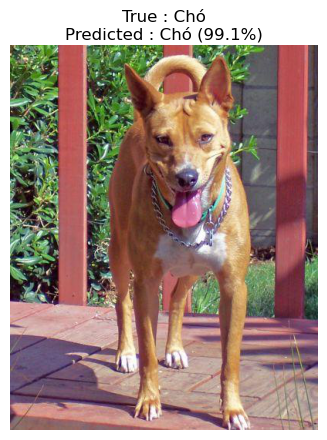


---Kết thúc---


In [105]:
print(f"\n--Hiển thị hình ảnh--")
#hàm hiển thị
def imshow_inference(inp,title=None):
    inp=inp.cpu().numpy().transpose((1,2,0))
    mean=np.array(normalize_mean)
    std=np.array(normalize_std)
    inp=std*inp+mean
    inp=np.clip(inp,0,1)
    plt.show(inp)
    if title:plt.title(title,wrap=True)
    plt.axis('off')

#tạo tiêu đề và vẽ
display_title=(f"True : {true_label_name}\n"
               f"Predicted : {predicted_class_name} ({confidence:.1%})")
plt.figure(figsize=(12,5))
plt.imshow(input_image_pil)
plt.title(display_title,wrap=True)
plt.axis('off')

#lưu ảnh kết quả
#tạo tên file lưu dựa trên ảnh gốc
base_image_name=os.path.splitext(os.path.basename(image_path))[0] #lấy tên file không có đuôi
#tạo đường dẫn đến file lưu result_dir
inference_save_path=os.path.join(result_dir,f"{base_image_name}_inference.jpg")
try:
    plt.savefig(inference_save_path) #lưu đồ thị hiện tại thành file ảnh
    print(f"Đã lưu ảnh kết quả tại {inference_save_path}")
except Exception as e:
    print(f"Lỗi khi lưu ảnh kết quả: {e}")
    exit()
plt.show()
print(f"\n---Kết thúc---")
#Kết thúc đoạn mã

